In [1]:
import  tensorflow as tf
from tensorflow import keras

In [2]:
print("Num GPUs available:",len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs available: 1


In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
print(tf.version.VERSION)


2.1.0


In [5]:
import sys

In [6]:
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

In [7]:
!pip install tensorflow


In [8]:
!pip install matplotlib


In [9]:
!pip install pandas


In [10]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [11]:
# Testing the dataset 
path_single = r"C:\Users\HP\Desktop\A10\img\image_1.h5"
path_single_mask = r"C:\Users\HP\Desktop\A10\mask\mask_1.h5"

C:\Users\HP\anaconda3\envs\project_1\lib\site-packages\ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


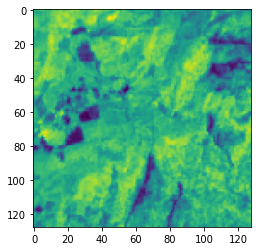

In [12]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


C:\Users\HP\anaconda3\envs\project_1\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


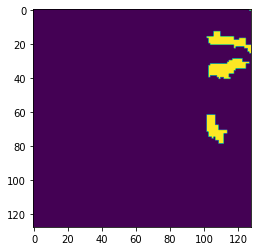

In [13]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [14]:
path_single = r"C:\Users\HP\Desktop\A10\img\image_1.h5"
path_single_mask = r"C:\Users\HP\Desktop\A10\mask\mask_1.h5"
TRAIN_PATH = r"C:\Users\HP\Desktop\A10\img\*.h5"
TRAIN_MASK = r"C:\Users\HP\Desktop\A10\mask\*.h5"

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [15]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 C:\Users\HP\Desktop\A10\img\image_1.h5 C:\Users\HP\Desktop\A10\mask\mask_1.h5
1 C:\Users\HP\Desktop\A10\img\image_10.h5 C:\Users\HP\Desktop\A10\mask\mask_10.h5
2 C:\Users\HP\Desktop\A10\img\image_100.h5 C:\Users\HP\Desktop\A10\mask\mask_100.h5
3 C:\Users\HP\Desktop\A10\img\image_1000.h5 C:\Users\HP\Desktop\A10\mask\mask_1000.h5
4 C:\Users\HP\Desktop\A10\img\image_1001.h5 C:\Users\HP\Desktop\A10\mask\mask_1001.h5
5 C:\Users\HP\Desktop\A10\img\image_1002.h5 C:\Users\HP\Desktop\A10\mask\mask_1002.h5
6 C:\Users\HP\Desktop\A10\img\image_1003.h5 C:\Users\HP\Desktop\A10\mask\mask_1003.h5
7 C:\Users\HP\Desktop\A10\img\image_1004.h5

C:\Users\HP\anaconda3\envs\project_1\lib\site-packages\ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\envs\project_1\lib\site-packages\ipykernel_launcher.py:29: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


 C:\Users\HP\Desktop\A10\mask\mask_1004.h5
8 C:\Users\HP\Desktop\A10\img\image_1005.h5 C:\Users\HP\Desktop\A10\mask\mask_1005.h5
9 C:\Users\HP\Desktop\A10\img\image_1006.h5 C:\Users\HP\Desktop\A10\mask\mask_1006.h5
10 C:\Users\HP\Desktop\A10\img\image_1007.h5 C:\Users\HP\Desktop\A10\mask\mask_1007.h5
11 C:\Users\HP\Desktop\A10\img\image_1008.h5 C:\Users\HP\Desktop\A10\mask\mask_1008.h5
12 C:\Users\HP\Desktop\A10\img\image_1009.h5 C:\Users\HP\Desktop\A10\mask\mask_1009.h5
13 C:\Users\HP\Desktop\A10\img\image_101.h5 C:\Users\HP\Desktop\A10\mask\mask_101.h5
14 C:\Users\HP\Desktop\A10\img\image_1010.h5 C:\Users\HP\Desktop\A10\mask\mask_1010.h5
15 C:\Users\HP\Desktop\A10\img\image_1011.h5 C:\Users\HP\Desktop\A10\mask\mask_1011.h5
16 C:\Users\HP\Desktop\A10\img\image_1012.h5 C:\Users\HP\Desktop\A10\mask\mask_1012.h5
17 C:\Users\HP\Desktop\A10\img\image_1013.h5 C:\Users\HP\Desktop\A10\mask\mask_1013.h5
18 C:\Users\HP\Desktop\A10\img\image_1014.h5 C:\Users\HP\Desktop\A10\mask\mask_1014.h5
19 C

C:\Users\HP\anaconda3\envs\project_1\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


1704 C:\Users\HP\Desktop\A10\img\image_2532.h5 C:\Users\HP\Desktop\A10\mask\mask_2532.h5
1705 C:\Users\HP\Desktop\A10\img\image_2533.h5 C:\Users\HP\Desktop\A10\mask\mask_2533.h5
1706 C:\Users\HP\Desktop\A10\img\image_2534.h5 C:\Users\HP\Desktop\A10\mask\mask_2534.h5
1707 C:\Users\HP\Desktop\A10\img\image_2535.h5 C:\Users\HP\Desktop\A10\mask\mask_2535.h5
1708 C:\Users\HP\Desktop\A10\img\image_2536.h5 C:\Users\HP\Desktop\A10\mask\mask_2536.h5
1709 C:\Users\HP\Desktop\A10\img\image_2537.h5 C:\Users\HP\Desktop\A10\mask\mask_2537.h5
1710 C:\Users\HP\Desktop\A10\img\image_2538.h5 C:\Users\HP\Desktop\A10\mask\mask_2538.h5
1711 C:\Users\HP\Desktop\A10\img\image_2539.h5 C:\Users\HP\Desktop\A10\mask\mask_2539.h5
1712 C:\Users\HP\Desktop\A10\img\image_254.h5 C:\Users\HP\Desktop\A10\mask\mask_254.h5
1713 C:\Users\HP\Desktop\A10\img\image_2540.h5 C:\Users\HP\Desktop\A10\mask\mask_2540.h5
1714 C:\Users\HP\Desktop\A10\img\image_2541.h5 C:\Users\HP\Desktop\A10\mask\mask_2541.h5
1715 C:\Users\HP\Deskto

C:\Users\HP\anaconda3\envs\project_1\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


2294 C:\Users\HP\Desktop\A10\img\image_3063.h5 C:\Users\HP\Desktop\A10\mask\mask_3063.h5
2295 C:\Users\HP\Desktop\A10\img\image_3064.h5 C:\Users\HP\Desktop\A10\mask\mask_3064.h5
2296 C:\Users\HP\Desktop\A10\img\image_3065.h5 C:\Users\HP\Desktop\A10\mask\mask_3065.h5
2297 C:\Users\HP\Desktop\A10\img\image_3066.h5 C:\Users\HP\Desktop\A10\mask\mask_3066.h5
2298 C:\Users\HP\Desktop\A10\img\image_3067.h5 C:\Users\HP\Desktop\A10\mask\mask_3067.h5
2299 C:\Users\HP\Desktop\A10\img\image_3068.h5 C:\Users\HP\Desktop\A10\mask\mask_3068.h5
2300 C:\Users\HP\Desktop\A10\img\image_3069.h5 C:\Users\HP\Desktop\A10\mask\mask_3069.h5
2301 C:\Users\HP\Desktop\A10\img\image_307.h5 C:\Users\HP\Desktop\A10\mask\mask_307.h5
2302 C:\Users\HP\Desktop\A10\img\image_3070.h5 C:\Users\HP\Desktop\A10\mask\mask_3070.h5
2303 C:\Users\HP\Desktop\A10\img\image_3071.h5 C:\Users\HP\Desktop\A10\mask\mask_3071.h5
2304 C:\Users\HP\Desktop\A10\img\image_3072.h5 C:\Users\HP\Desktop\A10\mask\mask_3072.h5
2305 C:\Users\HP\Deskto

In [16]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


In [17]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


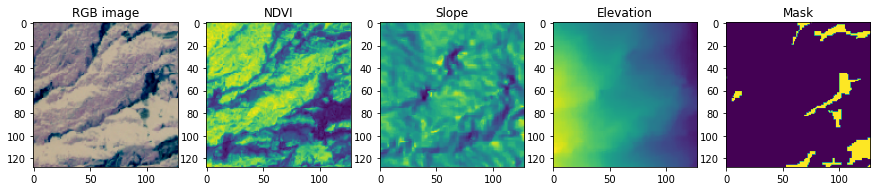

In [18]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [19]:
!pip install scikit-learn


In [20]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


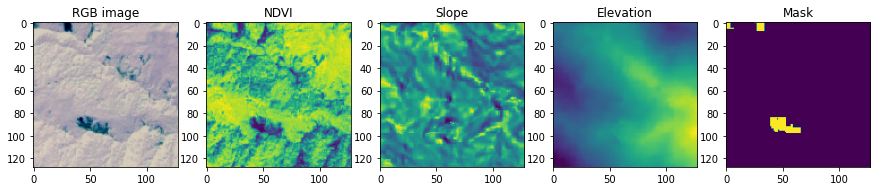

In [21]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [22]:
x_train.shape, y_train.shape
((3039, 128, 128, 6), (3039, 128, 128, 1))


((3039, 128, 128, 6), (3039, 128, 128, 1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


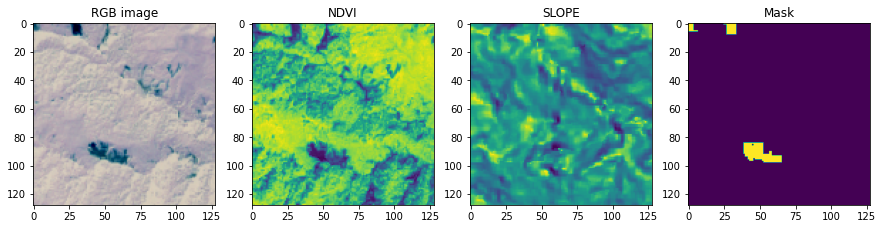

In [23]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [24]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))



In [25]:
# from utils import recall_m, precision_m, f1_m
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [29]:
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
#arlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    #earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=100, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.h5")

Train on 3039 samples, validate on 760 samples
Epoch 1/100

Epoch 00001: val_f1_m improved from -inf to 1.20302, saving model to best_model.h5
3039/3039 - 7s - loss: 0.6501 - accuracy: 0.9768 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: nan - val_accuracy: 0.8980 - val_f1_m: 1.2030 - val_precision_m: 0.6443 - val_recall_m: 13.2997
Epoch 2/100

Epoch 00002: val_f1_m did not improve from 1.20302
3039/3039 - 6s - loss: 0.5718 - accuracy: 0.9768 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: nan - val_accuracy: 0.6925 - val_f1_m: 0.9720 - val_precision_m: 0.5175 - val_recall_m: 10.4184
Epoch 3/100

Epoch 00003: val_f1_m did not improve from 1.20302
3039/3039 - 6s - loss: 0.5050 - accuracy: 0.9768 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7092 - val_f1_m: 1.0644 - val_precision_m: 0.5643 - val_recall_m: 13.4276
Epoch 4/100

Epoch 00004: val_f1_m did not improve fro

In [30]:

loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

nan 0.97685605 1.9552288 1.0 54.92992


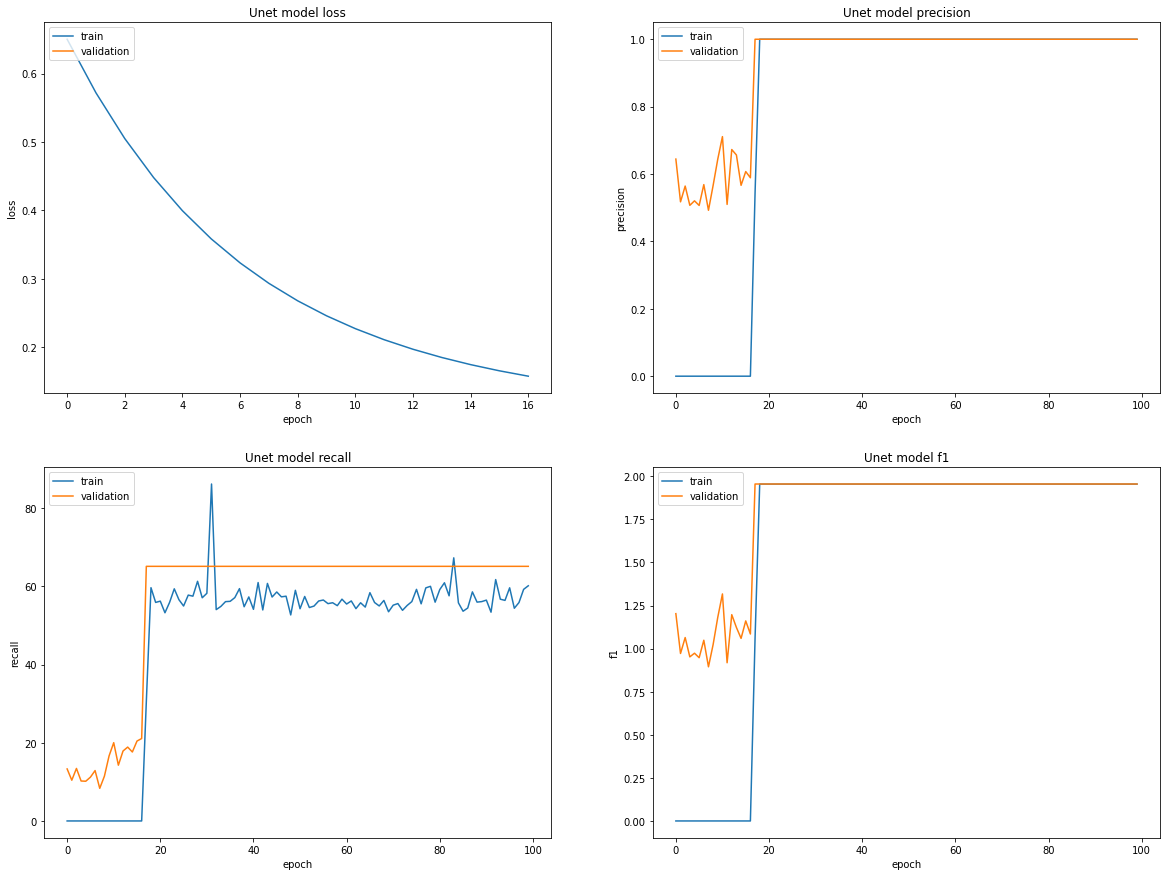

In [31]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [32]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

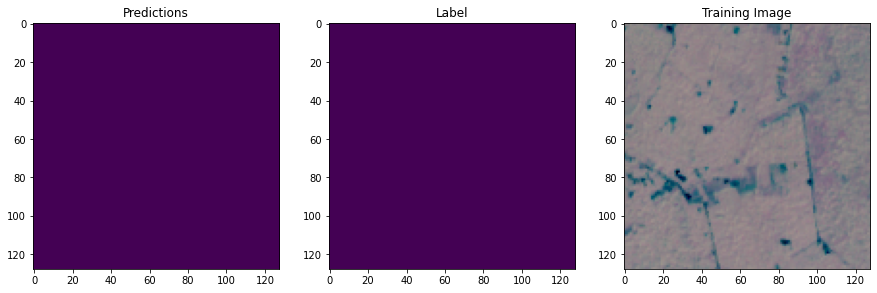

In [34]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')